In [1]:
import numpy as np
import matplotlib.pyplot as plt
### Set random seed
np.random.seed(3)
### Initialize the parameters
d = 10**2
n = d
n_iter = 10**2
### Initialize the variables
x_0 = 1./np.sqrt(d)*np.random.randn(d)
y_0 = 1./np.sqrt(d)*np.random.randn(d)
norm_M = 0
M = np.zeros((n,d,d))
b = np.zeros((n,d))
a = np.zeros((n,d))



### Simple bilinear objective.
for i in range(d):
    M[i] = np.zeros((d,d))
    M[i][i,i] = 1
    a[i,:] = 1./np.sqrt(d)*np.random.randn(d)
    b[i,:] = 1./np.sqrt(d)*np.random.randn(d)
    
    
### Compute the solution
M_mean = np.mean(M,0)
b_mean = np.mean(b,0)
a_mean = np.mean(a,0)
y_star = np.linalg.solve(M_mean,-a_mean)
x_star = np.linalg.solve(M_mean.T,-b_mean)


### To save the data
Results = {}

In [2]:
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    red, green, blue = tableau20[i]    
    tableau20[i] = (red / 255., green / 255., blue / 255.) 

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pylab 
pylab.rcParams['figure.figsize'] = (8, 5)
import numpy as np
import matplotlib.pyplot as plt
import json
plt.rcParams['text.latex.preamble'] = [r"\usepackage{lmodern}"]
params = {'text.usetex': True,
         'font.size': 15,
         'font.family': 'lmodern',
         'text.latex.unicode': True,
         }
plt.rcParams.update(params)

/home/gidelgau/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [4]:
class adam:
    def __init__(self,M,a,b , beta_1 = 0,beta_2= .99,epsilon_0 = 1e-16):
        self.epsilon_0 = epsilon_0
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        self.first_moment_x = np.zeros(d)
        self.first_moment_y = np.zeros(d)
        self.second_moment_y = np.zeros(d)
        self.second_moment_x = np.zeros(d)
        self.M = M
        self.a = a 
        self.b = b
    def adam_direction(self,x,y,x_snap,y_snap,i,t):
        (d_x,d_y) = SVRG_dir(x,y,x_snap,y_snap,i)
        self.first_moment_x = self.beta_1 * self.first_moment_x + (1- self.beta_1)* d_x
        self.second_moment_x = self.beta_2 * self.second_moment_x + (1-self.beta_2)  * d_x**2
        self.first_moment_y = self.beta_1 * self.first_moment_y + (1- self.beta_1)* d_y
        self.second_moment_y = self.beta_2 * self.second_moment_y + (1-self.beta_2)  * d_y**2
        d_x_t =  d_x * np.abs(self.first_moment_x) / (1-self.beta_1**(t+1)) / (np.sqrt(self.second_moment_x)/(1-self.beta_2**(t+1))+self.epsilon_0)
        d_y_t =  d_y * np.abs(self.first_moment_y) / (1-self.beta_1**(t+1)) / (np.sqrt(self.second_moment_y)/(1-self.beta_2**(t+1))+self.epsilon_0)
        return (d_x_t,d_y_t)
    def old_adam_direction(self,x,y,x_snap,y_snap,i,t):
        (d_x,d_y) = SVRG_dir(x,y,x_snap,y_snap,i)
        self.first_moment_x = self.beta_1 * self.first_moment_x + (1- self.beta_1)* d_x
        self.second_moment_x = self.beta_2 * self.second_moment_x + (1-self.beta_2)  * d_x**2
        self.first_moment_y = self.beta_1 * self.first_moment_y + (1- self.beta_1)* d_y
        self.second_moment_y = self.beta_2 * self.second_moment_y + (1-self.beta_2)  * d_y**2
        d_x_t =  self.first_moment_x / (1-self.beta_1**(t+1)) / (np.sqrt(self.second_moment_x)/(1-self.beta_2**(t+1))+self.epsilon_0)
        d_y_t =  self.first_moment_y / (1-self.beta_1**(t+1)) / (np.sqrt(self.second_moment_y)/(1-self.beta_2**(t+1))+self.epsilon_0)
        return (d_x_t,d_y_t)
    def adadelta_direction(self,x,y,x_snap,y_snap,i,t):
        (d_x,d_y) = SVRG_dir(x,y,x_snap,y_snap,i)
        self.first_moment_x = self.beta_2 * self.first_moment_x + (1- self.beta_2)* d_x
        self.second_moment_x = self.beta_2 * self.second_moment_x + (1-self.beta_2)  * d_x**2
        self.first_moment_y = self.beta_2 * self.first_moment_y + (1- self.beta_2)* d_y
        self.second_moment_y = self.beta_2 * self.second_moment_y + (1-self.beta_2)  * d_y**2
        d_x_t =  d_x * self.first_moment_x **2 / (self.second_moment_x+self.epsilon_0)
        d_y_t =  d_y * self.first_moment_y **2 / (self.second_moment_y+self.epsilon_0)
        return (d_x_t,d_y_t)
        

In [5]:
class gradient:
    def __init__(self,M,a,b ,gamma = .1):
        self.M = M
        self.a = a 
        self.b = b
        self.gamma = gamma
        
    def gradient_direction(self,x_t,y_t,i):
        x_grad = (self.M[i].dot(y_t) + self.a[i])
        y_grad = (self.M[i].T.dot(x_t)+ self.b[i])         
        return (-self.gamma * x_grad,self.gamma * y_grad)

In [6]:
def proj(x): 
    n = x.shape[0]
    #return np.minimum(np.ones(n),np.maximum(-np.ones(n),x))
    return x

def SVRG_dir(x,y,x_snap,y_snap,i):
    d_x = M[i].dot(y) - M[i].dot(y_snap) + M_mean.dot(y_snap) + a_mean
    d_y = M[i].T.dot(x) - M[i].T.dot(x_snap) + M_mean.T.dot(x_snap) + b_mean
    return(d_x,d_y)

def f_i(x,y,i):
    return np.sum(x * M[i].dot(y) + a[i]*x+ b[i]*y)

def progress(x,y,i,L,d_x,d_y,f):
    x_ = x + d_x
    y_ = y + d_y
    norm_grad= np.sum((d_x)**2 + (d_y)**2 )
    return np.abs(f(x_,y_,i) - f(x,y,i) - np.sum(d_x * (M[i].dot(y) + a[i]) + d_y * (M[i].T.dot(x) + b[i]))) <  L * norm_grad /2

def lip_test(i,L,d,d_,x,x_,y,y_):
    return np.linalg.norm(d_ - d) < L * np.sqrt(np.linalg.norm(x-x_)**2 + np.linalg.norm(y-y_))

In [7]:
f = 0
for i in range(n):
    f +=f_i(x_star,y_star,i)
print(f)

9.615773703310373


In [8]:
def AdamSVRG(n_pass,nb_rand,x_0,y_0,x_star,y_star,n,alpha = .1, beta_1 = .99,beta_2= .999,epsilon_0 = 1e-8):
    adam_grad = adam(M,a,b ,alpha = alpha, beta_1 = beta_1,beta_2= beta_2,epsilon_0 = epsilon_0)
    l_norm_adam = np.zeros((nb_rand,10*n_pass+1))
    l_norm_av = np.zeros((nb_rand,10*n_pass+1))
    for ran in range(nb_rand):
        x_t = x_0.copy()
        y_t = y_0.copy()
        x_t_av = x_t.copy()
        y_t_av = y_t.copy()
        norm_grad = np.linalg.norm(x_t-x_star) + np.linalg.norm(y_t-y_star)
        l_norm_adam[ran,0] = norm_grad
        l_norm_av[ran,0] = norm_grad
        S_t = 1
        for t in range(int(n_pass*n)):
            i = np.random.randint(n)
            for k in range(5):
                d_t = adam_grad.adam_direction(x_t,y_t,i,t)
                x_t = proj(x_t +d_t[0])
            d_t = adam_grad.adam_direction(x_t,y_t,i,t)
            x_t_av += x_t
            y_t = proj(y_t+d_t[1])
            y_t_av += y_t
            S_t += 1
            if np.mod(t*10,n) == 0:
                norm_grad = np.linalg.norm(x_t-x_star) + np.linalg.norm(y_t-y_star)
                l_norm_adam[ran,10*t//n+1] = norm_grad
                norm_grad = np.linalg.norm(x_t_av/S_t-x_star) + np.linalg.norm(y_t_av/S_t-y_star)
                l_norm_av[ran,10*t//n+1] = norm_grad
    return (l_norm_adam,l_norm_av)

In [9]:
def AvgSGD(n_pass,nb_rand,x_0,y_0,x_star,y_star,n,gamma = .1, restart = .1):
    l_SimSGD = np.zeros((nb_rand,10*n_pass+1))
    l_AvgSGD = np.zeros((nb_rand,10*n_pass+1))
    for ran in range(nb_rand):
        x_grad = x_0.copy()
        y_grad = y_0.copy()
        x_grad_av = x_0.copy()
        y_grad_av = y_0.copy()
        S_t = 1
        norm_grad = np.linalg.norm(x_grad_av/S_t-x_star) + np.linalg.norm(y_grad_av/S_t-y_star)
        l_SimSGD[ran,0] = norm_grad
        l_AvgSGD[ran,0] = norm_grad
        for t in range(int(n_pass * n)):
            # gamma = 0.1
            if restart is not None:
                if np.random.binomial(1,1./n * restart):
                    x_grad = x_grad_av.copy()/S_t
                    y_grad = y_grad_av.copy()/S_t
                    S_t = 1
                    x_grad_av = x_grad.copy()
                    y_grad_av = y_grad.copy()
            i = np.random.randint(n)
            x_grad = proj(x_grad - gamma  * (M[i].dot(y_grad) + a[i]))
            y_grad = proj(y_grad + gamma  * (M[i].T.dot(x_grad)+ b[i]))
            x_grad_av +=  x_grad
            y_grad_av +=  y_grad
            S_t += 1
            if np.mod(t*10,n) == 0:
                norm_grad = np.linalg.norm(x_grad-x_star) + np.linalg.norm(y_grad-y_star)
                l_SimSGD[ran,10*t//n+1] = norm_grad
                norm_grad = np.linalg.norm(x_grad_av/S_t-x_star) + np.linalg.norm(y_grad_av/S_t-y_star)
                l_AvgSGD[ran,10*t//n+1] = norm_grad
    return (l_SimSGD,l_AvgSGD)

In [10]:
def ExtraSVRG(n_pass,nb_rand,x_0,y_0,x_star,y_star,n,gamma = .1,linesearch= None,restart = None,beta_2 = None, ada = None):
    l_SEM =  np.zeros((nb_rand,10*n_pass//2+1))
    l_avg_SEM = np.zeros((nb_rand,10*n_pass//2+1))
    l_grad_SEM = np.zeros((nb_rand,10*n_pass//2+1))
    if ada:
            adam_grad = adam(M,a,b,beta_1 = 0,beta_2= beta_2)
    for ran in range(nb_rand):
        x_grad = x_0.copy()
        y_grad = y_0.copy()
        x_avg = x_0.copy()
        y_avg = y_0.copy()
        x_snap = x_0.copy()
        y_snap = y_0.copy()
        S_t = 1
        gamma_x = gamma
        gamma_y = gamma
        l_grad = []
        dist_opt = np.linalg.norm(x_grad-x_star) + np.linalg.norm(y_grad-y_star)
        l_SEM[ran,0] = dist_opt
        l_avg_SEM[ran,0] = dist_opt
        for t in range(n_pass*n //2):
            if np.random.binomial(1,1./n):
                if restart is not None:
                    if np.random.binomial(1,restart):
                        x_grad = x_avg.copy()/S_t
                        y_grad = y_avg.copy()/S_t
                        S_t = 1
                        x_avg = x_grad.copy()
                        y_avg = y_grad.copy()
                x_snap = x_grad.copy()
                y_snap = y_grad.copy()
            # First step
            i = np.random.randint(n)
            if ada == "adam":
                (d_x,d_y) = adam_grad.adam_direction(x_grad,y_grad,x_snap,y_snap,i,t)
            elif ada == "delta":
                (d_x,d_y) = adam_grad.adadelta_direction(x_grad,y_grad,x_snap,y_snap,i,t)
            elif ada == "old adam":
                (d_x,d_y) = adam_grad.old_adam_direction(x_grad,y_grad,x_snap,y_snap,i,t)
                l_grad.append((d_x,d_y))
            else:
                (d_x,d_y) = SVRG_dir(x_grad,y_grad,x_snap,y_snap,i)
            x_extra = proj(x_grad - gamma_x * d_x)
            y_extra = proj(y_grad + gamma_y * d_y)
            x_avg += x_grad
            y_avg += y_grad          
            # Extrapolation step
            i = np.random.randint(n)
            if ada == "adam":
                (d_x,d_y) = adam_grad.adam_direction(x_extra,y_extra,x_snap,y_snap,i,t)
            elif ada == "delta":
                (d_x,d_y) = adam_grad.adadelta_direction(x_extra,y_extra,x_snap,y_snap,i,t)
            elif ada == "old adam":
                (d_x,d_y) = adam_grad.old_adam_direction(x_extra,y_extra,x_snap,y_snap,i,t)
            else:
                (d_x,d_y) = SVRG_dir(x_extra,y_extra,x_snap,y_snap,i)
            x_grad = proj(x_grad - gamma_x * d_x)
            y_grad = proj(y_grad + gamma_y * d_y)
            S_t += 1
            if np.mod(t*10,n) == 0:
                #print("diff point %f, diff grad:%f" % (np.linalg.norm(x_extra-x_snap),np.linalg.norm(d_x - M_mean.dot(y_extra) - a_mean)))
                l_SEM[ran,10*t//n+1] = np.linalg.norm(x_grad-x_star) + np.linalg.norm(y_grad-y_star)
                l_avg_SEM[ran,10*t//n+1] = np.linalg.norm(x_avg/S_t-x_star) + np.linalg.norm(y_avg/S_t-y_star)
    return(l_SEM,l_avg_SEM)


In [11]:
# ADAM baseline
n_pass = 600
nb_rand = 5
alpha = .002
beta_1 = 0
beta_2 = .999
epsilon_0 = 1e-8
gamma = .3

In [12]:
l_adam = ExtraSVRG(n_pass,nb_rand,x_0,y_0,x_star,y_star,n,gamma = gamma,  beta_2 = 0.9, restart = .1, ada = "adam")
#l_SimADAM = l_adam[0]
l_AvgADAM = l_adam[1]

In [13]:
l_old_adam = ExtraSVRG(n_pass,nb_rand,x_0,y_0,x_star,y_star,n,gamma = gamma,  beta_2 = 0.9, restart = .1, ada = "old adam")

In [14]:
l_grad = AvgSGD(n_pass,nb_rand,x_0,y_0,x_star,y_star,n,gamma = gamma, restart = .1)
l_SGD = l_grad[0]
l_AvgSGD = l_grad[1]

In [15]:
l_SVRG, l_avg_SVRG = ExtraSVRG(n_pass,nb_rand,x_0,y_0,x_star,y_star,n,gamma = gamma)

In [16]:
l_SVRG_2, l_avg_SVRG_2 = ExtraSVRG(n_pass,nb_rand,x_0,y_0,x_star,y_star,n,gamma = gamma,restart=.05)
l_SVRG_3, l_avg_SVRG_3 = ExtraSVRG(n_pass,nb_rand,x_0,y_0,x_star,y_star,n,gamma = gamma,restart=.1)
l_SVRG_4, l_avg_SVRG_4 = ExtraSVRG(n_pass,nb_rand,x_0,y_0,x_star,y_star,n,gamma = gamma,restart=.5)

In [17]:
def av_std(l):
    av = np.mean(l,0)
    std = np.std(l,0)/2
    return (av,av + std,av-std)
   
AltSGD1,supAltSGD,infAltSGD = av_std(l_AvgSGD)
ExtraSVRG1,supExtraSVRG,infExtraSVRG = av_std(l_avg_SVRG)
ExtraSVRG2,supExtraSVRG2,infExtraSVRG2 = av_std(l_SVRG_2)
ExtraSVRG3,supExtraSVRG3,infExtraSVRG3 = av_std(l_SVRG_3)
ExtraSVRG4,supExtraSVRG4,infExtraSVRG4 = av_std(l_SVRG_4)
AdaSVRG1,supAdaSVRG,infAdaSVRG = av_std(l_adam[0])
AdaSVRG2,supAdaSVRG2,infAdaSVRG2 = av_std(l_old_adam[0])

(0, 600)

(5e-06, 3000)

Text(0.5, 0, 'Number of passes')

Text(0, 0.5, 'Distance to the optimum')

/home/gidelgau/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['lmodern'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


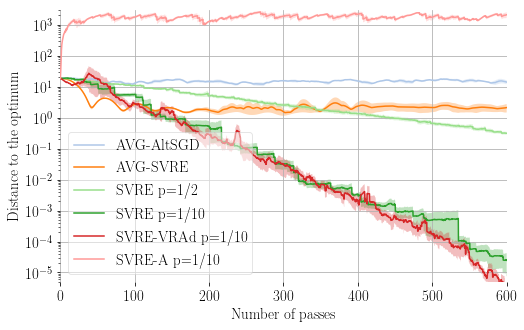

In [18]:
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False)  

# Ensure that the axis ticks only show up on the bottom and left of the plot.  
# Ticks on the right and top of the plot are generally unnecessary chartjunk.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  

def plot_with_bar(l):
    l,l_,_l = av_std(l)

t_extra = 2.*np.array(range(n_pass*10//2+1)) / 10.
t_grad = np.array(range(n_pass*10+1)) / 10.
plt.xlim([0,600])
plt.ylim([.000005,3000])

plt.semilogy(t_grad,AltSGD1,label="AVG-AltSGD", color = tableau20[1])
plt.fill_between(t_grad,infAltSGD,supAltSGD, facecolor=tableau20[1], alpha = 0.3)

plt.plot(t_extra,ExtraSVRG1,label=r"AVG-SVRE", color = tableau20[2])
plt.fill_between(t_extra,infExtraSVRG,supExtraSVRG, facecolor=tableau20[2], alpha = 0.3)

#plt.plot(t_extra,ExtraSVRG2,label=r"SVRE p=1/20", color = tableau20[3])
#plt.fill_between(t_extra,infExtraSVRG2,supExtraSVRG2, facecolor=tableau20[3], alpha = 0.3)

plt.plot(t_extra, ExtraSVRG4,label=r"SVRE p=1/2", color = tableau20[5])
plt.fill_between(t_extra,infExtraSVRG4,supExtraSVRG4, facecolor=tableau20[5], alpha = 0.3)


plt.plot(t_extra, ExtraSVRG3,label=r"SVRE p=1/10", color = tableau20[4])
plt.fill_between(t_extra, infExtraSVRG3,supExtraSVRG3, facecolor=tableau20[4], alpha = 0.3)


plt.plot(t_extra,AdaSVRG1,label=r"SVRE-VRAd p=1/10", color = tableau20[6])
plt.fill_between(t_extra,infAdaSVRG,supAdaSVRG, facecolor=tableau20[6], alpha = 0.3)

plt.plot(t_extra, AdaSVRG2,label=r"SVRE-A p=1/10", color = tableau20[7])
plt.fill_between(t_extra, infAdaSVRG2,supAdaSVRG2, facecolor=tableau20[7], alpha = 0.3)

plt.xlabel('Number of passes')
plt.ylabel('Distance to the optimum')
plt.grid()
plt.legend(fancybox = True, framealpha = .5)
plt.savefig('bilinear_obj.pdf',bbox_inches='tight')
plt.show()